In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [6]:
# declare a Base using 'automap_base'
Base = automap_base()

In [7]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables
Base.metadata.tables

immutabledict({'measurement': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.

In [36]:
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x18d59df6208>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [39]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x18d59dde390>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
prec = [Measurement.date, Measurement.prcp]
latest_year = session.query(*prec).order_by(Measurement.date.desc()).first()
latest_year

('2017-08-23', 0.0)

In [15]:
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
one_year = session.query(*prec).filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()
one_year


 ('2016-12-13', 0.05),
 ('2016-12-14', 0.03),
 ('2016-12-15', 0.0),
 ('2016-12-16', 0.0),
 ('2016-12-17', 0.01),
 ('2016-12-18', 0.13),
 ('2016-12-19', 0.01),
 ('2016-12-20', 0.0),
 ('2016-12-21', 0.0),
 ('2016-12-22', 0.01),
 ('2016-12-23', 0.01),
 ('2016-12-24', 0.01),
 ('2016-12-25', 0.0),
 ('2016-12-26', 0.02),
 ('2016-12-27', 0.0),
 ('2016-12-28', 0.02),
 ('2016-12-29', 0.04),
 ('2016-12-30', 0.12),
 ('2016-12-31', 0.01),
 ('2017-01-01', 0.0),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-11', 0.0),
 ('2017-01-12', 0.0),
 ('2017-01-13', 0.0),
 ('2017-01-14', 0.0),
 ('2017-01-15', 0.0),
 ('2017-01-16', 0.0),
 ('2017-01-17', 0.0),
 ('2017-01-18', 0.0),
 ('2017-01-19', 0.0),
 ('2017-01-20', 0.0),
 ('2017-01-21', 0.0),
 ('2017-01-22', 0.16),
 ('2017-01-23', 0.0),
 ('2017-01-24', 0.04),
 ('2017-01-25', 0.03),
 ('2017-01-26',

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(one_year, columns = ['date', 'precipitation_scores'])

# Sort the dataframe by date
df.set_index('date', inplace = True)
df.sort_values(by='date', inplace = True)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text major ticklabel objects>)

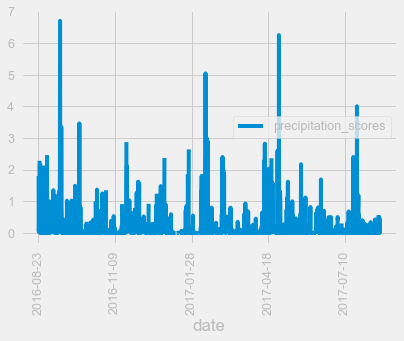

In [17]:
# # Use Pandas Plotting with Matplotlib to plot the data
df.plot.line()
plt.xticks(rotation = 90)

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_all = session.query(Measurement.prcp).all()
df_2 = pd.DataFrame(prec_all, columns = ['precipitation_scores'])
df_2.describe()

,precipitation_scores
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).count()

19550

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(desc(func.count(Measurement.station))).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# lowest temerature
calc_station = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
calc_station
                                                                                            

[(54.0)]

In [22]:
# highest temperature 
calc_station = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
calc_station


[(85.0)]

In [23]:
# average temperature 
calc_station = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
calc_station

[(71.66378066378067)]

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [25]:
# Filter the Query
year = [Measurement.date, Measurement.tobs]
year_station = session.query(*year).filter(Measurement.date.between('2016-08-23', '2017-08-23'),(Measurement.station == 'USC00519281')).\
order_by(Measurement.date).all()
year_station

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [26]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_3 = pd.DataFrame(year_station, columns = ['date', 'temperature'])
# Sort the dataframe by date
df_3.set_index('date', inplace = True)
df_3

,temperature
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


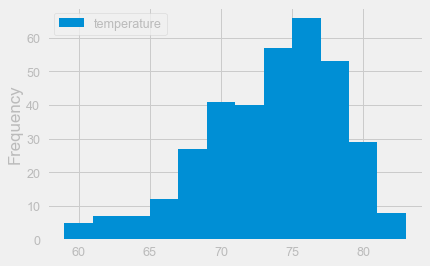

In [27]:
# Plot the result as histogram
df_3.plot.hist(bins = 12)

# Close session

In [28]:
# Close Session
session.close()